Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

Reading Dataset


In [2]:
data=pd.read_csv("/content/Loan_Prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
numerical_features = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include = [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Checking for Null Values

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing Null Values with Mode and Median

In [5]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Verifying

In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Conversion to Numerical Values

In [7]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
data['Married'].replace({'Yes':1,'No':0},inplace=True)
data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
data['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [8]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype("int64")
data['LoanAmount']=data['LoanAmount'].astype("int64")
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype("int64")
data['Credit_History']=data['Credit_History'].astype("int64")

Label Encoding

In [9]:
le = LabelEncoder()
data['Loan_ID'] = le.fit_transform(data.Loan_ID)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [10]:
smote = SMOTETomek(0.90)

y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [11]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    364
0    321
Name: Loan_Status, dtype: int64


In [12]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.738141,0.534021,-1.232227,-0.721158,0.599272,-0.326533,0.135683,-0.553073,-0.279253,0.288984,0.567797,1.366559
1,-1.732292,0.534021,0.811539,0.310143,0.599272,-0.326533,-0.096991,-0.012886,-0.169844,0.288984,0.567797,-1.205124
2,-1.726443,0.534021,0.811539,-0.721158,0.599272,3.062481,-0.387925,-0.553073,-1.017765,0.288984,0.567797,1.366559
3,-1.720594,0.534021,0.811539,-0.721158,-1.668691,-0.326533,-0.464564,0.291596,-0.279253,0.288984,0.567797,1.366559
4,-1.714745,0.534021,-1.232227,-0.721158,0.599272,-0.326533,0.163435,-0.553073,0.007946,0.288984,0.567797,1.366559


Splitting of Data into Train and Test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 30)

KNN Model

In [14]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Testing accuracy:  0.7444933920704846
Training accuracy:  0.834061135371179


In [17]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Loan_Status,,
0,67,40
1,18,102


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       107
           1       0.72      0.85      0.78       120

    accuracy                           0.74       227
   macro avg       0.75      0.74      0.74       227
weighted avg       0.75      0.74      0.74       227



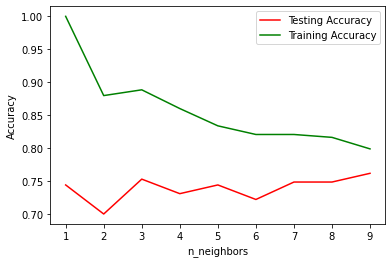

In [19]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color ='red')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color ='green')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()